<a href="https://colab.research.google.com/github/OllieGuo/OllieGuo/blob/main/MMA823_Session_1_Getting_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yahoo Finance
Stock Index, eg, ^GSPC
Curreny Exchange rate, e.g, GBPUSD=X
Options,

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import importlib.util
package_name = 'yfinance'
spec = importlib.util.find_spec(package_name)
if spec is None:
    print(package_name +" is not installed")
    !pip install yfinance

import yfinance as yf

#single Stock
apple = yf.download('AAPL',
                       start='2000-01-01',
                       end='2023-12-31')


[*********************100%%**********************]  1 of 1 completed


In [ ]:
apple.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844981,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.773741,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.785063,778321600


In [ ]:
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.024185,42628800


In [ ]:
type(apple)

pandas.core.frame.DataFrame

In [ ]:
apple.shape

(6037, 6)

OHLC - What are those numbers?

You can aslo just download the values you need, e.g., 'Adj Close':

In [ ]:
data = yf.download(['TSLA', 'GOOG'],
                       start='2011-01-01',
                       end='2024-12-31')['Adj Close']

[*********************100%%**********************]  2 of 2 completed


In [ ]:
data.head(3)

Ticker,GOOG,TSLA
Date,,
2011-01-03,15.035221,1.774667
2011-01-04,14.979742,1.778000
2011-01-05,15.152647,1.788667


In [ ]:
data.tail()

Ticker,GOOG,TSLA
Date,,
2024-06-27,186.860001,197.419998
2024-06-28,183.419998,197.880005
2024-07-01,184.490005,209.860001
2024-07-02,186.610001,231.259995
2024-07-03,187.389999,246.389999


# You can also gey other stock data, eg, minute-by-minute, or monthly ...

In [ ]:
#Several stocks
tickers =['AAPL','AMZN','GOOGL','META', 'MCD', 'GM', 'TSLA','PFE']

start_date='2000-01-01'
end_date='2021-12-31'

df=yf.download(
        # tickers list or string as well
        tickers,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        #auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%%**********************]  8 of 8 completed


In [ ]:
df.head(5)

Ticker            AMZN                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2024-01-02  151.539993  152.380005  148.389999  149.929993  149.929993   
2024-01-03  149.199997  151.050003  148.330002  148.470001  148.470001   
2024-01-04  145.589996  147.380005  144.050003  144.570007  144.570007   
2024-01-05  144.690002  146.589996  144.529999  145.240005  145.240005   
2024-01-08  146.740005  149.399994  146.149994  149.100006  149.100006   

Ticker                     GOOGL                                      ...  \
Price         Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2024-01-02  47339400  138.550003  139.449997  136.479996  138.169998  ...   
2024-01-03  49425500  137.250000  139.630005  137.080002  138.919998  ...   
2024-01-04  56039800  138.419998  139.160004  136.350006  136.389999  ...   
2024-01-05  45124800  136.750000  137.160004  135.149994  135.729996  ...   
2024-01-08  46757100  136.289993  139.009995  136.259995  138.839996  ...   

Ticker            TSLA                                           AAPL  \
Price              Low       Close   Adj Close     Volume        Open   
Date                                                                    
2024-01-02  244.410004  248.419998  248.419998  104654200  187.149994   
2024-01-03  236.320007  238.449997  238.449997  121082600  184.220001   
2024-01-04  237.729996  237.929993  237.929993  102629300  182.149994   
2024-01-05  234.899994  237.490005  237.490005   92379400  181.990005   
2024-01-08  235.300003  240.449997  240.449997   85166600  182.089996   

Ticker                                                                
Price             High         Low       Close   Adj Close    Volume  
Date                                                                  
2024-01-02  188.440002  183.889999  185.639999  185.152283  82488700  
2024-01-03  185.880005  183.429993  184.250000  183.765945  58414500  
2024-01-04  183.089996  180.880005  181.910004  181.432098  71983600  
2024-01-05  182.759995  180.169998  181.179993  180.703995  62303300  
2024-01-08  185.600006  181.500000  185.559998  185.072495  59144500  

[5 rows x 48 columns]

In [ ]:
df.dropna().head()

Ticker            AMZN                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2024-01-02  151.539993  152.380005  148.389999  149.929993  149.929993   
2024-01-03  149.199997  151.050003  148.330002  148.470001  148.470001   
2024-01-04  145.589996  147.380005  144.050003  144.570007  144.570007   
2024-01-05  144.690002  146.589996  144.529999  145.240005  145.240005   
2024-01-08  146.740005  149.399994  146.149994  149.100006  149.100006   

Ticker                     GOOGL                                      ...  \
Price         Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2024-01-02  47339400  138.550003  139.449997  136.479996  138.169998  ...   
2024-01-03  49425500  137.250000  139.630005  137.080002  138.919998  ...   
2024-01-04  56039800  138.419998  139.160004  136.350006  136.389999  ...   
2024-01-05  45124800  136.750000  137.160004  135.149994  135.729996  ...   
2024-01-08  46757100  136.289993  139.009995  136.259995  138.839996  ...   

Ticker            TSLA                                           AAPL  \
Price              Low       Close   Adj Close     Volume        Open   
Date                                                                    
2024-01-02  244.410004  248.419998  248.419998  104654200  187.149994   
2024-01-03  236.320007  238.449997  238.449997  121082600  184.220001   
2024-01-04  237.729996  237.929993  237.929993  102629300  182.149994   
2024-01-05  234.899994  237.490005  237.490005   92379400  181.990005   
2024-01-08  235.300003  240.449997  240.449997   85166600  182.089996   

Ticker                                                                
Price             High         Low       Close   Adj Close    Volume  
Date                                                                  
2024-01-02  188.440002  183.889999  185.639999  185.152283  82488700  
2024-01-03  185.880005  183.429993  184.250000  183.765945  58414500  
2024-01-04  183.089996  180.880005  181.910004  181.432098  71983600  
2024-01-05  182.759995  180.169998  181.179993  180.703995  62303300  
2024-01-08  185.600006  181.500000  185.559998  185.072495  59144500  

[5 rows x 48 columns]

<Axes: xlabel='Date'>

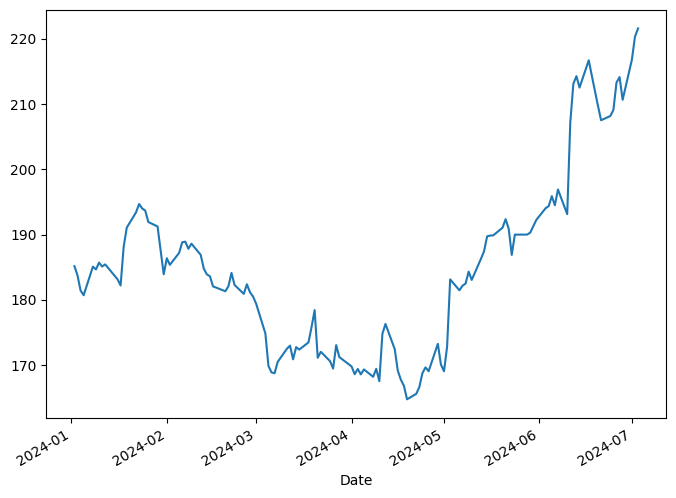

In [ ]:
df['AAPL']['Adj Close'].plot(figsize=(8,6))

# You can also get company info

In [ ]:

tsla=yf.Ticker('TSLA')

In [ ]:
tsla.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

In [ ]:
tsla.info['companyOfficers']

[{'maxAge': 1,
  'name': 'Mr. Elon R. Musk',
  'age': 51,
  'title': 'Technoking of Tesla, CEO & Director',
  'yearBorn': 1972,
  'fiscalYear': 2022,
  'exercisedValue': 0,
  'unexercisedValue': 27819718656},
 {'maxAge': 1,
  'name': 'Mr. Andrew D. Baglino',
  'age': 42,
  'title': 'Senior Vice President of Powertrain & Energy Engineering',
  'yearBorn': 1981,
  'fiscalYear': 2022,
  'totalPay': 303000,
  'exercisedValue': 33866368,
  'unexercisedValue': 57355632},
 {'maxAge': 1,
  'name': 'Mr. Vaibhav  Taneja',
  'age': 45,
  'title': 'CFO, Corporate Controller & Chief Accounting Officer',
  'yearBorn': 1978,
  'fiscalYear': 2022,
  'exercisedValue': 0,
  'unexercisedValue': 0},
 {'maxAge': 1,
  'name': 'Mr. Martin  Viecha',
  'title': 'Senior Director for Investor Relations',
  'fiscalYear': 2022,
  'exercisedValue': 0,
  'unexercisedValue': 0},
 {'maxAge': 1,
  'name': 'Brian  Scelfo',
  'title': 'Senior Director of Corporate Development',
  'fiscalYear': 2022,
  'exercisedValue': 0

In [ ]:
tsla.info['forwardPE']

78.21905

In [ ]:
tsla.info['trailingPE']

62.85459

In [ ]:
tsla.history(period="max").info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3527 entries, 2010-06-29 00:00:00-04:00 to 2024-07-03 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3527 non-null   float64
 1   High          3527 non-null   float64
 2   Low           3527 non-null   float64
 3   Close         3527 non-null   float64
 4   Volume        3527 non-null   int64  
 5   Dividends     3527 non-null   float64
 6   Stock Splits  3527 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 220.4 KB


# List the dividend payments and stock splits:  corporate action

In [ ]:
tsla.actions

,Dividends,Stock Splits
Date,,
2020-08-31 00:00:00-04:00,0.0,5.0
2022-08-25 00:00:00-04:00,0.0,3.0


In [ ]:
tsla.dividends

Series([], Name: Dividends, dtype: float64)

In [ ]:
tsla.splits

Date
2020-08-31 00:00:00-04:00    5.0
2022-08-25 00:00:00-04:00    3.0
Name: Stock Splits, dtype: float64

# Download Futures Price

[*********************100%%**********************]  3 of 3 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CLK24.NYM']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


<Axes: xlabel='Date'>

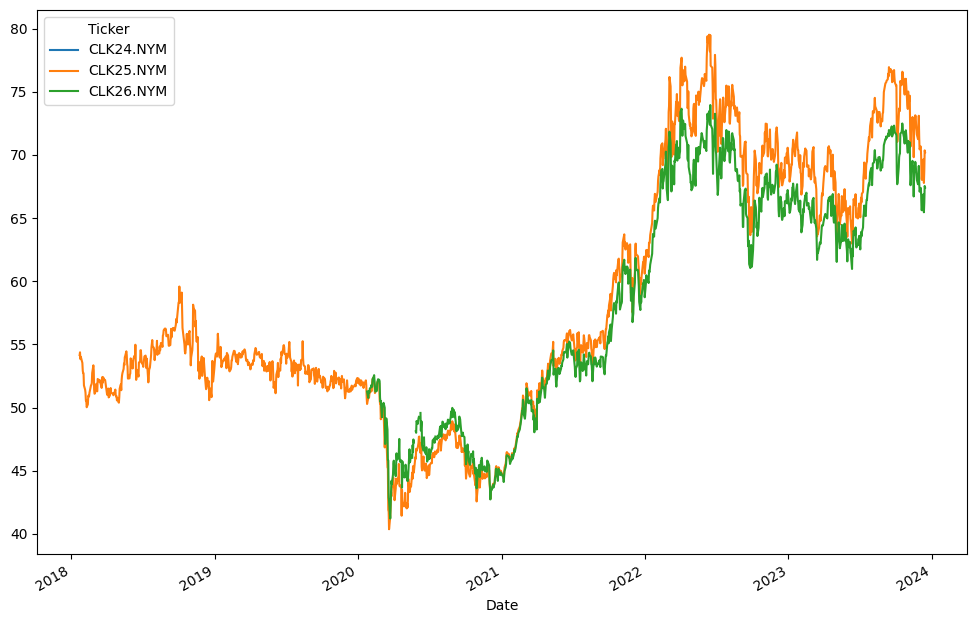

In [ ]:
data = yf.download("CLK24.NYM, CLK25.NYM, CLK26.NYM", start="2018-01-01", end="2023-12-18")
data['Close'].plot(figsize=(12,8))


[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

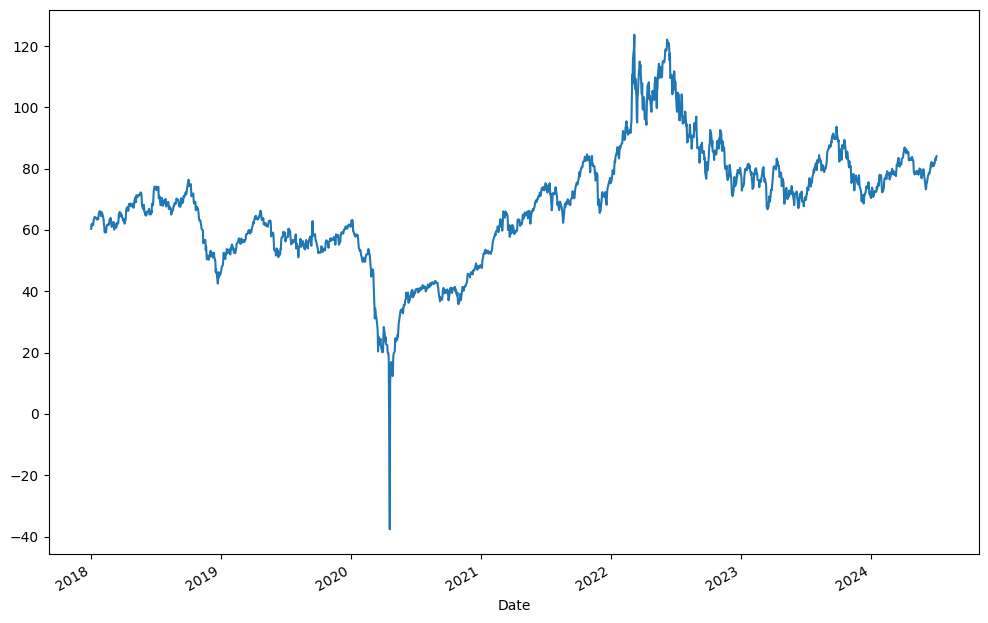

In [ ]:
#Front Month Crude Oil Futures
data = yf.download("CL=F", start="2018-01-01")
data['Close'].plot(figsize=(12,8))

# Download options data using the yfinance
## First, let us look at what maturity dates are traded

In [ ]:
#Look at SP500 options
spx=yf.Ticker('^SPX')
spx.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 5509.01,
 'regularMarketPreviousClose': 5509.01,
 'volume': 1564167864,
 'regularMarketVolume': 1564167864,
 'averageVolume': 3848858709,
 'averageVolume10days': 4126042000,
 'averageDailyVolume10Day': 4126042000,
 'fiftyTwoWeekHigh': 5539.27,
 'fiftyDayAverage': 5300.5234,
 'twoHundredDayAverage': 4881.5786,
 'currency': 'USD',
 'exchange': 'WCB',
 'quoteType': 'INDEX',
 'symbol': '^SPX',
 'underlyingSymbol': '^GSPC',
 'shortName': 'S&P 500 INDEX',
 'longName': 'S&P 500 INDEX',
 'firstTradeDateEpochUtc': -1325583000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EDT',
 'uuid': '598377dc-b757-301a-9621-bbef63eca4d0',
 'messageBoardId': 'finmb_INDEXSPX',
 'gmtOffSetMilliseconds': -14400000,
 'trailingPegRatio': None}

In [ ]:
spx.options

('2024-07-05',
 '2024-07-08',
 '2024-07-09',
 '2024-07-10',
 '2024-07-11',
 '2024-07-12',
 '2024-07-15',
 '2024-07-16',
 '2024-07-17',
 '2024-07-18',
 '2024-07-19',
 '2024-07-22',
 '2024-07-23',
 '2024-07-24',
 '2024-07-25',
 '2024-07-26',
 '2024-07-29',
 '2024-07-30',
 '2024-07-31',
 '2024-08-01',
 '2024-08-02',
 '2024-08-05',
 '2024-08-06',
 '2024-08-08',
 '2024-08-09',
 '2024-08-16',
 '2024-08-30',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-10-31',
 '2024-11-15',
 '2024-11-29',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-05-16',
 '2025-06-20',
 '2025-06-30',
 '2025-07-18',
 '2025-09-19',
 '2025-12-19',
 '2026-03-20',
 '2026-06-18',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [ ]:
#Options expiring on a particular date - OPtion Chain
opt_chain = spx.option_chain(date='2024-12-20')
opt_chain

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice      bid  \
0    SPX241220C00200000 2024-06-25 15:36:46+00:00   200.0    5245.70  5309.80   
1    SPX241220C00400000 2024-03-08 19:13:26+00:00   400.0    4708.09  4773.20   
2    SPX241220C00500000 2024-02-15 16:54:20+00:00   500.0    4478.37  4577.30   
3    SPX241220C00600000 2024-02-15 16:54:20+00:00   600.0    4382.87  4481.40   
4    SPX241220C00800000 2023-11-29 14:30:05+00:00   800.0    3759.65     0.00   
..                  ...                       ...     ...        ...      ...   
145  SPX241220C08400000 2024-06-26 14:45:14+00:00  8400.0       0.15     0.05   
146  SPX241220C08600000 2024-06-26 14:48:53+00:00  8600.0       0.10     0.15   
147  SPX241220C08800000 2024-06-26 14:48:53+00:00  8800.0       0.05     0.00   
148  SPX241220C09000000 2024-07-01 19:53:47+00:00  9000.0       0.15     0.00   
149  SPX241220C09200000 2024-07-01 19:53:23+00:00  9200.0       0.10     0.00   

         ask 

In [ ]:
opt_chain.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPX241220C00200000,2024-06-25 15:36:46+00:00,200.0,5245.70,5309.80,5318.50,0.0,0.0,2478.0,0,0.000010,True,REGULAR,USD
1,SPX241220C00400000,2024-03-08 19:13:26+00:00,400.0,4708.09,4773.20,4790.20,0.0,0.0,2.0,2856,0.000010,True,REGULAR,USD
2,SPX241220C00500000,2024-02-15 16:54:20+00:00,500.0,4478.37,4577.30,6395.00,0.0,0.0,1.0,1,6.193179,True,REGULAR,USD
3,SPX241220C00600000,2024-02-15 16:54:20+00:00,600.0,4382.87,4481.40,6262.10,0.0,0.0,1.0,2552,4.731114,True,REGULAR,USD
4,SPX241220C00800000,2023-11-29 14:30:05+00:00,800.0,3759.65,0.00,0.00,0.0,0.0,1.0,3002,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,SPX241220C08400000,2024-06-26 14:45:14+00:00,8400.0,0.15,0.05,0.25,0.0,0.0,39.0,0,0.197396,False,REGULAR,USD
146,SPX241220C08600000,2024-06-26 14:48:53+00:00,8600.0,0.10,0.15,0.25,0.0,0.0,39.0,0,0.207405,False,REGULAR,USD
147,SPX241220C08800000,2024-06-26 14:48:53+00:00,8800.0,0.05,0.00,0.25,0.0,0.0,26.0,0,0.217049,False,REGULAR,USD
148,SPX241220C09000000,2024-07-01 19:53:47+00:00,9000.0,0.15,0.00,0.20,0.0,0.0,1.0,0,0.222664,False,REGULAR,USD


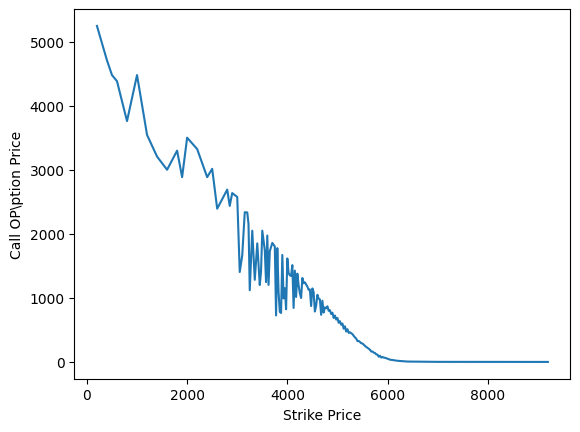

In [ ]:
plt.plot(opt_chain.calls.strike, opt_chain.calls.lastPrice)
plt.xlabel('Strike Price')
plt.ylabel('Call OP\ption Price')
plt.show()

In [ ]:
opt_chain.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPX241220P00200000,2024-06-25 15:36:46+00:00,200.0,0.05,0.00,0.05,0.0000,0.000000,2478.0,0,1.324222,False,REGULAR,USD
1,SPX241220P00400000,2024-04-24 15:55:27+00:00,400.0,0.05,0.00,0.15,0.0000,0.000000,20.0,5952,1.115239,False,REGULAR,USD
2,SPX241220P00500000,2024-04-30 18:25:38+00:00,500.0,0.07,0.00,0.15,0.0000,0.000000,32.0,3123,1.017583,False,REGULAR,USD
3,SPX241220P00600000,2024-05-24 16:47:32+00:00,600.0,0.07,0.00,0.20,0.0000,0.000000,60.0,9963,0.958985,False,REGULAR,USD
4,SPX241220P00800000,2024-06-24 18:55:02+00:00,800.0,0.10,0.05,0.10,0.0000,0.000000,25.0,0,0.817385,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,SPX241220P08400000,2024-07-02 16:03:09+00:00,8400.0,2730.47,2676.40,2683.20,0.0000,0.000000,1.0,0,0.000010,True,REGULAR,USD
157,SPX241220P08600000,2024-05-17 19:48:42+00:00,8600.0,3056.70,0.00,0.00,0.0000,0.000000,1.0,0,0.000010,True,REGULAR,USD
158,SPX241220P08800000,2024-07-03 17:13:13+00:00,8800.0,3065.83,3064.20,3072.90,-226.3899,-6.876512,8.0,0,0.000010,True,REGULAR,USD
159,SPX241220P09000000,2024-05-21 19:34:49+00:00,9000.0,3423.09,0.00,0.00,0.0000,0.000000,1.0,0,0.000010,True,REGULAR,USD


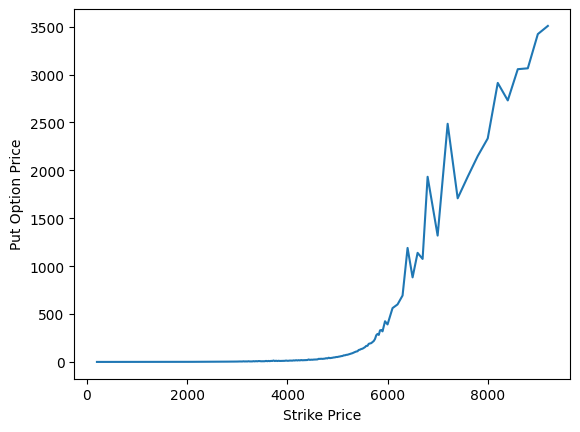

In [ ]:
plt.plot(opt_chain.puts.strike, opt_chain.puts.lastPrice)
plt.xlabel('Strike Price')
plt.ylabel('Put Option Price')
plt.show()

# Quandl
First, let's start by importing some libraries.
"Quandl" allows us to get data from NASDAQ
You need to get an API key on Quandl's website. Sign-up and getting an API key is free but has some limits. As a logged-in free user, you will be able to call 2,000 calls per 10 minutes maximum (speed limit), and 50,000 calls per day (volume limit). https://www.quandl.com/  (which will lead you to https://data.nasdaq.com/)

The stocks selected for this example are Apple, Amazon, Google, Facebook, MacDonald, General MOtor, Tesla, and Pfizer, . Below code block will get daily adjusted closing price of each stock

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import importlib.util
package = 'quandl'
spec = importlib.util.find_spec(package)
if spec is None:
    print(package+" is not installed")
    !pip install --upgrade quandl



quandl is not installed


In [ ]:
import quandl

quandl.ApiConfig.api_key = 'PNzc8CxVBCyfmzjfFqaz'
stocks = ['AAPL','AMZN','GOOGL','FB', 'MCD', 'GM', 'TSLA','PFE']
df_quandl = quandl.get_table('WIKI/PRICES', ticker = stocks,
                   date = { 'gte': '2016-1-1', 'lte': '2021-12-31' }, paginate=True)
df_quandl.head(5)

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,TSLA,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
1,TSLA,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2,TSLA,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
3,TSLA,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
4,TSLA,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


In [ ]:
df = df_quandl.set_index('date')
table = df.pivot(columns='ticker')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head(5)

,AAPL,AMZN,FB,GM,GOOGL,MCD,PFE,TSLA,AAPL,AMZN,...,PFE,TSLA,AAPL,AMZN,FB,GM,GOOGL,MCD,PFE,TSLA
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,102.61,656.29,101.95,33.45,762.20,117.25,31.85,230.72,105.368,657.715,...,29.614720,223.41,67649387.0,9314519.0,37912403.0,14875381.0,3369068.0,9995004.0,37306299.0,6827146.0
2016-01-05,105.75,646.86,102.89,33.33,764.10,117.41,32.18,226.36,105.850,646.910,...,29.827908,223.43,55790992.0,5822603.0,23258238.0,19755908.0,2260795.0,6312701.0,27302655.0,3186752.0
2016-01-06,100.56,622.00,101.13,31.95,750.37,118.00,31.73,220.00,102.370,639.790,...,29.299571,219.04,68457388.0,5329197.0,25096183.0,27514380.0,2410301.0,6543740.0,25845908.0,3779128.0
2016-01-07,98.68,621.80,100.50,30.26,746.49,117.44,31.16,214.19,100.130,630.000,...,29.104920,215.65,81094428.0,7074915.0,45172906.0,21030692.0,3156563.0,7472323.0,37205401.0,3554251.0
2016-01-08,98.55,619.66,99.88,30.46,747.80,115.75,31.55,217.86,99.110,624.140,...,28.734157,211.00,70798016.0,5512915.0,35402298.0,16447761.0,2375348.0,6103181.0,33053066.0,3628058.0


In [ ]:
quandl.ApiConfig.api_key = 'PNzc8CxVBCyfmzjfFqaz'
stocks = ['AAPL','AMZN','GOOGL','FB', 'MCD', 'GM', 'TSLA','PFE']
df_quandl = quandl.get_table('WIKI/PRICES', ticker = stocks,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2016-1-1', 'lte': '2021-12-31' }, paginate=True)
df_quandl.head()

,date,ticker,adj_close
None,,,
0,2018-03-27,TSLA,279.18
1,2018-03-26,TSLA,304.18
2,2018-03-23,TSLA,301.54
3,2018-03-22,TSLA,309.10
4,2018-03-21,TSLA,316.53


<Axes: xlabel='Date'>

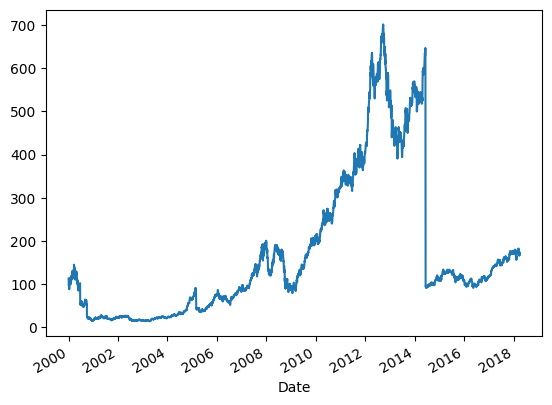

In [ ]:

df_aapl = quandl.get(dataset='WIKI/AAPL',
                       start_date='2000-01-01',
                       end_date='2023-12-31')
df_aapl.Close.plot()

# For the Data available at, see https://data.nasdaq.com/


# Example: US GDP Data

In [ ]:
gdp=quandl.get('FRED/GDP')
               #start_date='1970-01-01',end_date='2021-12-31')

<Axes: xlabel='Date'>

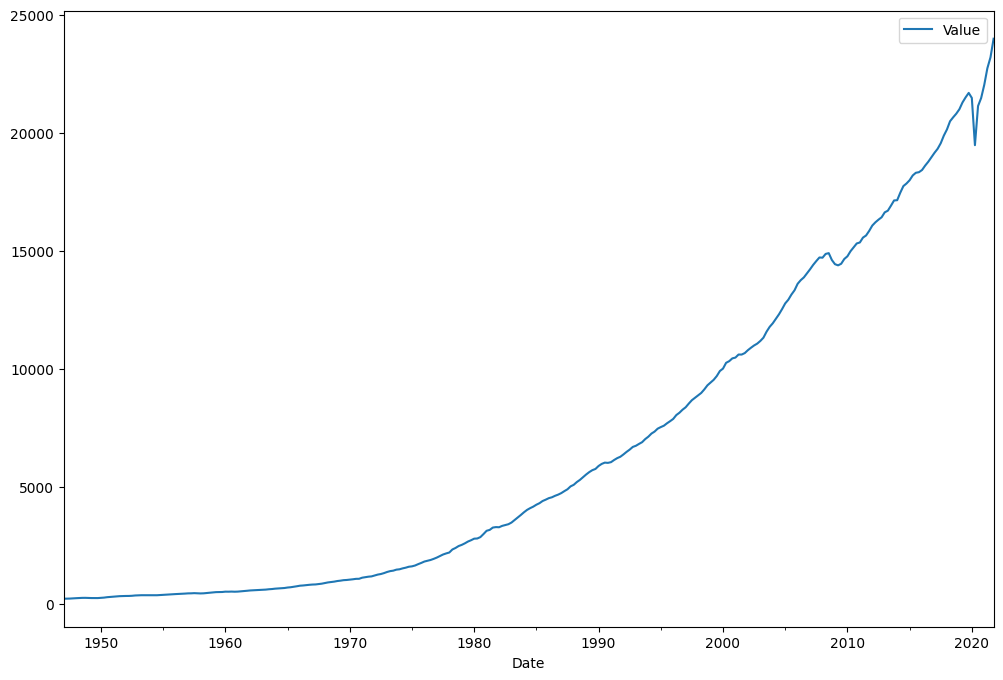

In [ ]:
gdp.plot(figsize=(12, 8))

# You can also download option data. Here is the volatility data

# Let us compare US GDP with SP 500DP

In [ ]:
spx=yf.download('^GSPC', start='1970-01-01',end='2022-12-31', interval='3mo' )
gdp=quandl.get('FRED/GDP',start_date='1970-01-01',end_date='2022-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
spx.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-01-01,167.199997,183.949997,163.360001,180.660004,180.660004,7021420000
1985-04-01,180.660004,191.850006,177.860001,191.850006,191.850006,6449220000
1985-07-01,191.850006,196.070007,179.449997,182.080002,182.080002,6246430000
1985-10-01,182.059998,213.080002,181.160004,211.279999,211.279999,7792990000
1986-01-01,211.279999,240.110001,202.600006,238.899994,238.899994,8992710000


In [ ]:
gdp.head(5)

,Value
Date,
1970-01-01,1051.200
1970-04-01,1067.375
1970-07-01,1086.059
1970-10-01,1088.608
1971-01-01,1135.156


In [ ]:
data=spx.join(gdp).dropna()

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Value
Date,,,,,,,
1985-01-01,167.199997,183.949997,163.360001,180.660004,180.660004,7021420000,4230.168
1985-04-01,180.660004,191.850006,177.860001,191.850006,191.850006,6449220000,4294.887
1985-07-01,191.850006,196.070007,179.449997,182.080002,182.080002,6246430000,4386.773
1985-10-01,182.059998,213.080002,181.160004,211.279999,211.279999,7792990000,4444.094
1986-01-01,211.279999,240.110001,202.600006,238.899994,238.899994,8992710000,4507.894
...,...,...,...,...,...,...,...
2020-10-01,3385.870117,3760.199951,3233.939941,3756.070068,3756.070068,287561840000,21477.597
2021-01-01,3764.610107,3994.409912,3662.709961,3972.889893,3972.889893,327571270000,22038.226
2021-04-01,3992.780029,4302.430176,3992.780029,4297.500000,4297.500000,273990130000,22740.959


In [ ]:
data.drop(columns=['Open','High','Low','Close','Volume'], inplace=True)

In [ ]:
data

,Adj Close,Value
Date,,
1985-01-01,180.660004,4230.168
1985-04-01,191.850006,4294.887
1985-07-01,182.080002,4386.773
1985-10-01,211.279999,4444.094
1986-01-01,238.899994,4507.894
...,...,...
2020-10-01,3756.070068,21477.597
2021-01-01,3972.889893,22038.226
2021-04-01,4297.500000,22740.959


For a times series $S_1, S_2, \cdots, S_T$, we write the single period return as
$r_t=\ln\frac{S_t}{S_{t-1}}$. The total return over the time period will be
$r_1+r_2+\cdots+r_T$  

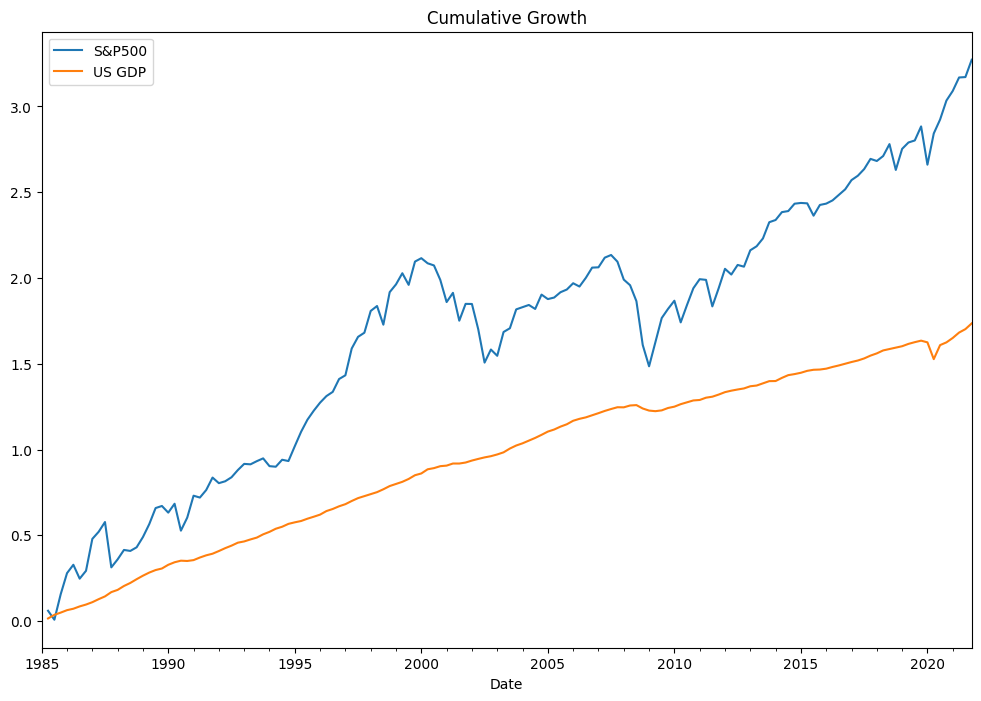

In [ ]:
data.rename(columns={'Adj Close':'S&P500', 'Value':'US GDP'}, inplace=True)
growth=np.log(data/data.shift(1)).cumsum().plot(figsize=(12,8))
plt.title('Cumulative Growth')
plt.savefig('SP500+gdp.jpg')
plt.show()

## Group Assignment Question 1
From the above graph, we can see S&P 500 index growths much faster than GDP. Can you state this observation in economical term?  What might be the possible explanation?

# Other sources
For Example:  CRSP using the WRDS service (not free)

#  Stock Indices

 ## Dow-Jones Industrial Average

In [ ]:
import pandas as pd

# There are 2 tables on the Wikipedia page,  we want the second table
#First table: description

components = \
pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average#Components')

first_table = components[0]
second_table = components[1]
df = second_table
df

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,1.54%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.64%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.80%
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,NaN,2.93%
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.04%
5,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.36%
6,Caterpillar,NYSE,CAT,Construction and mining,1991-05-06,NaN,5.45%
7,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,2.59%
8,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.81%
9,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.02%


# Market Cap

In [ ]:

record=[]
#record=['Comapny', 'ticker', 'MarketCap']
for symbol in df['Symbol']:
    sys=symbol.replace('.', '-')  #BRk.B --> BRK-B
    info = yf.Ticker(sys).info
    marketcap = info['marketCap']
    record.append([symbol, marketcap])
    print(symbol, 'Market Cap: ', marketcap)

MMM Market Cap:  56232550400
AXP Market Cap:  169546907648
AMGN Market Cap:  165962268672
AMZN Market Cap:  2056239972352
AAPL Market Cap:  3397269848064
BA Market Cap:  113144963072
CAT Market Cap:  161685798912
CVX Market Cap:  286591254528
CSCO Market Cap:  189716660224
KO Market Cap:  272823107584
DIS Market Cap:  179769982976
DOW Market Cap:  37185536000
GS Market Cap:  150886891520
HD Market Cap:  330842112000
HON Market Cap:  138350985216
IBM Market Cap:  161426096128
INTC Market Cap:  132942045184
JNJ Market Cap:  350629232640
JPM Market Cap:  599288840192
MCD Market Cap:  180170489856
MRK Market Cap:  318754127872
MSFT Market Cap:  3424585252864
NKE Market Cap:  113564246016
PG Market Cap:  386661744640
CRM Market Cap:  252860563456
TRV Market Cap:  46643585024
UNH Market Cap:  450887417856
VZ Market Cap:  173084360704
V Market Cap:  550380437504
WMT Market Cap:  548891164672


In [ ]:
df[['Company', 'Symbol']]

,Company,Symbol
0,3M,MMM
1,American Express,AXP
2,Amgen,AMGN
3,Amazon,AMZN
4,Apple,AAPL
5,Boeing,BA
6,Caterpillar,CAT
7,Chevron,CVX
8,Cisco,CSCO
9,Coca-Cola,KO


# Last Close price

In [ ]:
import yfinance as yf

for symbol in df['Symbol']:
    ticker_yahoo = yf.Ticker(symbol)
    data = ticker_yahoo.history(period='1d')
    last_quote = (data.tail(1)['Close'].iloc[0])
    print(symbol,round(last_quote,2))


MMM 101.62
AXP 235.71
AMGN 309.38
AMZN 197.59
AAPL 221.55
BA 184.31
CAT 330.61
CVX 156.71
CSCO 47.09
KO 63.33
DIS 98.61
DOW 52.88
GS 467.92
HD 333.64
HON 212.46
IBM 175.73
INTC 31.23
JNJ 145.69
JPM 208.69
MCD 250.0
MRK 125.85
MSFT 460.77
NKE 75.24
PG 163.83
CRM 260.95
TRV 203.69
UNH 489.89
VZ 41.12
V 268.99
WMT 68.24


## S&P 500 Stocks Composite Index

In [ ]:
import pandas as pd

# There are 2 tables on the Wikipedia page, we want the first table
# second table shows the evolution of the changes

components = \
pd.read_html('https://en.wikipedia.org/wiki/List_of_S&P_500_companies')

first_table = components[0]
second_table = components[1]
sp_df = first_table
sp_df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
sp_df['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Utilities', 'Financials', 'Materials', 'Consumer Discretionary',
       'Real Estate', 'Communication Services', 'Consumer Staples',
       'Energy'], dtype=object)

In [ ]:
sp_df['GICS Sub-Industry'].unique()

array(['Industrial Conglomerates', 'Building Products',
       'Health Care Equipment', 'Biotechnology',
       'IT Consulting & Other Services', 'Application Software',
       'Semiconductors', 'Independent Power Producers & Energy Traders',
       'Life & Health Insurance', 'Life Sciences Tools & Services',
       'Industrial Gases', 'Hotels, Resorts & Cruise Lines',
       'Internet Services & Infrastructure', 'Specialty Chemicals',
       'Office REITs', 'Health Care Supplies', 'Electric Utilities',
       'Property & Casualty Insurance', 'Interactive Media & Services',
       'Tobacco', 'Broadline Retail',
       'Paper & Plastic Packaging Products & Materials',
       'Multi-Utilities', 'Passenger Airlines', 'Consumer Finance',
       'Multi-line Insurance', 'Telecom Tower REITs', 'Water Utilities',
       'Asset Management & Custody Banks',
       'Electrical Components & Equipment', 'Electronic Components',
       'Insurance Brokers', 'Oil & Gas Exploration & Production',
     

In [ ]:
sp_df[200:250]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
200,FI,Fiserv,Financials,Transaction & Payment Processing Services,"Brookfield, Wisconsin",2001-04-02,798354,1984
201,FMC,FMC Corporation,Materials,Fertilizers & Agricultural Chemicals,"Philadelphia, Pennsylvania",2009-08-19,37785,1883
202,F,Ford Motor Company,Consumer Discretionary,Automobile Manufacturers,"Dearborn, Michigan",1957-03-04,37996,1903
203,FTNT,Fortinet,Information Technology,Systems Software,"Sunnyvale, California",2018-10-11,1262039,2000
204,FTV,Fortive,Industrials,Industrial Machinery & Supplies & Components,"Everett, Washington",2016-07-01,1659166,2016
205,FOXA,Fox Corporation (Class A),Communication Services,Broadcasting,"New York City, New York",2019-03-04,1754301,2019
206,FOX,Fox Corporation (Class B),Communication Services,Broadcasting,"New York City, New York",2019-03-04,1754301,2019
207,BEN,Franklin Templeton,Financials,Asset Management & Custody Banks,"San Mateo, California",1998-04-30,38777,1947
208,FCX,Freeport-McMoRan,Materials,Copper,"Phoenix, Arizona",2011-07-01,831259,1912
209,GRMN,Garmin,Consumer Discretionary,Consumer Electronics,"Schaffhausen, Switzerland",2012-12-12,1121788,1989


In [ ]:
yf.Ticker('HAL').history(period='1d')['Close']

Date
2024-07-03 00:00:00-04:00    33.779999
Name: Close, dtype: float64

# Last Closing Price

In [ ]:

import warnings
warnings.filterwarnings("ignore")

## For some reason INFO has no data

SP500_Current_Price=[]

for symbol in sp_df['Symbol']:
    try:
    #if symbol != 'INFO':
        sym=symbol.replace('.', '-')  #For dual shares, eg, BRK.B, we have to change it to BRK-B
        ticker_yahoo = yf.Ticker(sym)
        data = ticker_yahoo.history(period='1d')
        last_quote = (data.tail(1)['Close'].iloc[0])
        SP500_Current_Price.append(
            {
                #     'Company':sym['Security'],
                "Ticker":sym,
                "Last Closing":last_quote
            }
        )
    except:
        pass

SP500_Current_Price=pd.DataFrame(SP500_Current_Price)

    #print(symbol,round(last_quote,2))

In [ ]:
SP500_Current_Price

,Ticker,Last Closing
0,MMM,101.620003
1,AOS,81.040001
2,ABT,102.330002
3,ABBV,163.839996
4,ACN,305.750000
...,...,...
498,XYL,132.710007
499,YUM,129.580002
500,ZBRA,312.850006
501,ZBH,106.580002


# List of PE

In [ ]:
yf.Ticker('IBM').info

{'address1': 'One New Orchard Road',
 'city': 'Armonk',
 'state': 'NY',
 'zip': '10504',
 'country': 'United States',
 'phone': '914 499 1900',
 'website': 'https://www.ibm.com',
 'industry': 'Information Technology Services',
 'industryKey': 'information-technology-services',
 'industryDisp': 'Information Technology Services',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "International Business Machines Corporation, together with its subsidiaries, provides integrated solutions and services worldwide. The company operates through Software, Consulting, Infrastructure, and Financing segments. The Software segment offers a hybrid cloud and AI platforms that allows clients to realize their digital and AI transformations across the applications, data, and environments in which they operate. The Consulting segment focuses on skills integration for strategy, experience, technology, and operations by domain and industry. The Infrastr

In [ ]:
yf.Ticker('IBM').info['trailingPE']


19.924036

In [ ]:
!dir

sample_data  SP500+gdp.jpg


In [ ]:
##Warning:  This takes a LONG time to run

SP500_PE=[]


for symbol in sp_df['Symbol']:
    try:
    #if symbol not in ['INFO', 'AES']:
        sym=symbol.replace('.', '-')  #For dual shares, eg, BRK.B, we have to change it to BRK-B
        ticker_yahoo = yf.Ticker(sym)
        print(symbol,round(ticker_yahoo.info['forwardPE'],2))
        SP500_PE.append(
            {
                "Ticker":sym,
                "trainlingPE":ticker_yahoo.info['trailingPE'],
                "forwardPE": ticker_yahoo.info['forwardPE']
            }
        )
    except:
        pass

SP500_PE=pd.DataFrame(SP500_PE)

    #    print(symbol,round(ticker_yahoo.info['forwardPE'],2))

MMM 12.99
AOS 18.63
ABT 19.91
ABBV 13.59
ACN 23.91
ADBE 29.74
AMD 31.46
AES 8.56
AFL 12.95
A 21.97
APD 18.85
ABNB 29.77
AKAM 13.36
ALB 12.88
ARE 33.08
ALGN 22.31
ALLE 15.14
LNT 15.63
ALL 9.12
GOOGL 21.61
GOOG 23.45
MO 8.69
AMZN 36.8
AMCR 13.0
AEE 14.4
AAL 3.99
AEP 14.67
AXP 17.02
AIG 9.42
AMT 29.25
AWK 22.61
AMP 11.37
AME 22.32
AMGN 16.21
APH 34.59
ADI 28.79
ANSS 31.26
AON 17.06
APA 5.99
AAPL 32.58
AMAT 26.94
APTV 9.03
ACGL 10.96
ADM 11.5
ANET 40.38
AJG 23.16
AIZ 9.6
T 8.77
ATO 16.29
ADSK 27.28
ADP 23.74
AZO 17.35
AVB 36.27
AVY 20.57
AXON 52.21
BKR 13.62
BALL 17.1
BAC 12.21
BK 9.93
BBWI 10.05
BAX 10.3
BDX 16.03
BRK.B 22.1
BBY 12.2
BIO 22.95
TECH 35.2
BIIB 12.96
BLK 18.1
BX 20.53
BA 38.97
BKNG 20.51
BWA 6.92
BXP 31.37
BSX 28.83
BMY 6.2
AVGO 30.96
BR 23.53
BRO 23.51
BF.B 21.14
BLDR 9.76
BG 11.12
CDNS 45.52
CZR 21.2
CPT 64.76
CPB 13.89
COF 8.66
CAH 12.71
KMX 19.38
CCL 11.41
CARR 20.67
CTLT 49.14
CAT 14.53
CBOE 18.84
CBRE 15.49
CDW 19.54
CE 9.82
COR 15.13
CNC 8.78
CNP 17.43
CF 12.67
CHRW 2

In [ ]:
SP500_PE.to_csv('sp500company_pe_2022.csv')

In [ ]:
!dir

sample_data  sp500company_pe_2022.csv  SP500+gdp.jpg
